In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
data = pd.read_csv(r"D:\OneDrive - Manipal Global Education Services Pvt Ltd\Official\MGAIT\Datasets\ML Datasets\credit-default.csv",na_values = ["unknown","none","unknown/none"])
data.head()

checking_balance  months_loan_duration credit_history    purpose  amount  \
0           < 0 DM                     6       critical   radio/tv    1169   
1       1 - 200 DM                    48         repaid   radio/tv    5951   
2              NaN                    12       critical  education    2096   
3           < 0 DM                    42         repaid  furniture    7882   
4           < 0 DM                    24        delayed  car (new)    4870   

  savings_balance employment_length  installment_rate personal_status  \
0             NaN           > 7 yrs                 4     single male   
1        < 100 DM         1 - 4 yrs                 2          female   
2        < 100 DM         4 - 7 yrs                 2     single male   
3        < 100 DM         4 - 7 yrs                 2     single male   
4        < 100 DM         1 - 4 yrs                 3     single male   

  other_debtors  ...                  property age  installment_plan  \
0           NaN  ...               real estate  67               NaN   
1           NaN  ...               real estate  22               NaN   
2           NaN  ...               real estate  49               NaN   
3     guarantor  ...  building society savings  45               NaN   
4           NaN  ...                       NaN  53               NaN   

    housing existing_credits  default  dependents  telephone foreign_worker  \
0       own                2        1           1        yes            yes   
1       own                1        2           1        NaN            yes   
2       own                1        1           2        NaN            yes   
3  for free                1        1           2        NaN            yes   
4  for free                2        2           2        NaN            yes   

                  job  
0    skilled employee  
1    skilled employee  
2  unskilled resident  
3    skilled employee  
4    skilled employee  

[5 rows x 21 columns]

In [3]:
data.shape

(1000, 21)

In [4]:
data.describe()

months_loan_duration        amount  installment_rate  \
count           1000.000000   1000.000000       1000.000000   
mean              20.903000   3271.258000          2.973000   
std               12.058814   2822.736876          1.118715   
min                4.000000    250.000000          1.000000   
25%               12.000000   1365.500000          2.000000   
50%               18.000000   2319.500000          3.000000   
75%               24.000000   3972.250000          4.000000   
max               72.000000  18424.000000          4.000000   

       residence_history          age  existing_credits      default  \
count        1000.000000  1000.000000       1000.000000  1000.000000   
mean            2.845000    35.546000          1.407000     1.300000   
std             1.103718    11.375469          0.577654     0.458487   
min             1.000000    19.000000          1.000000     1.000000   
25%             2.000000    27.000000          1.000000     1.000000   
50%             3.000000    33.000000          1.000000     1.000000   
75%             4.000000    42.000000          2.000000     2.000000   
max             4.000000    75.000000          4.000000     2.000000   

        dependents  
count  1000.000000  
mean      1.155000  
std       0.362086  
min       1.000000  
25%       1.000000  
50%       1.000000  
75%       1.000000  
max       2.000000

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      606 non-null    object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       817 non-null    object
 6   employment_length     1000 non-null   object
 7   installment_rate      1000 non-null   int64 
 8   personal_status       1000 non-null   object
 9   other_debtors         93 non-null     object
 10  residence_history     1000 non-null   int64 
 11  property              1000 non-null   object
 12  age                   1000 non-null   int64 
 13  installment_plan      186 non-null    object
 14  housing               1000 non-null   object
 15  existing_credits      1000 non-null   i

In [8]:
#Checking for unique values in categorical columns
for i in data.columns:
    if data[i].dtype == type(object):
        print(i,end=': ')
        print('\n',data[i].unique())
        print()

checking_balance: 
 ['< 0 DM' '1 - 200 DM' nan '> 200 DM']

credit_history: 
 ['critical' 'repaid' 'delayed' 'fully repaid' 'fully repaid this bank']

purpose: 
 ['radio/tv' 'education' 'furniture' 'car (new)' 'car (used)' 'business'
 'domestic appliances' 'repairs' 'others' 'retraining']

savings_balance: 
 [nan '< 100 DM' '501 - 1000 DM' '> 1000 DM' '101 - 500 DM']

employment_length: 
 ['> 7 yrs' '1 - 4 yrs' '4 - 7 yrs' 'unemployed' '0 - 1 yrs']

personal_status: 
 ['single male' 'female' 'divorced male' 'married male']

other_debtors: 
 [nan 'guarantor' 'co-applicant']

property: 
 ['real estate' 'building society savings' nan 'other']

installment_plan: 
 [nan 'bank' 'stores']

housing: 
 ['own' 'for free' 'rent']

telephone: 
 ['yes' nan]

foreign_worker: 
 ['yes' 'no']

job: 
 ['skilled employee' 'unskilled resident' 'mangement self-employed'
 'unemployed non-resident']



In [9]:
data.isnull().sum()

checking_balance        394
months_loan_duration      0
credit_history            0
purpose                   0
amount                    0
savings_balance         183
employment_length         0
installment_rate          0
personal_status           0
other_debtors           907
residence_history         0
property                154
age                       0
installment_plan        814
housing                   0
existing_credits          0
default                   0
dependents                0
telephone               596
foreign_worker            0
job                       0
dtype: int64

In [10]:
# Mean Imputation Missing Values for Numeric Variables
data["custAge"] = data["custAge"].fillna(data["custAge"].mean())

# Mode Imputation of Missing Values for Categorical Variables
data["schooling"] = data["schooling"].fillna(data["schooling"].mode()[0])
data["day_of_week"] = data["day_of_week"].fillna(data["day_of_week"].mode()[0])
data["default"] = data["default"].fillna(data["default"].mode()[0])
data["loan"] = data["loan"].fillna(data["loan"].mode()[0])
data["profession"] = data["profession"].fillna(data["profession"].mode()[0])
data["housing"] = data["housing"].fillna(data["housing"].mode()[0])
data["marital"] = data["marital"].fillna(data["marital"].mode()[0])


KeyError: 'custAge'

In [9]:
#Checking for unique values in categorical columns
for i in data.columns:
    if data[i].dtype == type(object):
        print(i,end=': ')
        print('\n',data[i].unique())
        print()

profession: 
 ['admin.' 'blue-collar' 'technician' 'management' 'services' 'unemployed'
 'housemaid' 'self-employed' 'retired' 'student' 'entrepreneur']

marital: 
 ['single' 'married' 'divorced']

schooling: 
 ['university.degree' 'high.school' 'basic.4y' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']

default: 
 ['no' 'yes']

housing: 
 ['no' 'yes']

loan: 
 ['no' 'yes']

contact: 
 ['cellular' 'telephone']

month: 
 ['nov' 'jul' 'may' 'aug' 'apr' 'jun' 'mar' 'oct' 'sep' 'dec']

day_of_week: 
 ['mon' 'wed' 'tue' 'fri' 'thu']

poutcome: 
 ['nonexistent' 'failure' 'success']

responded: 
 ['no' 'yes']



In [10]:
## univariate analysis of Target Variable


In [11]:
data['responded'].value_counts()

no     6574
yes     840
Name: responded, dtype: int64

In [12]:
#Checking the distribution of target variable in terms of percentage
data['responded'].value_counts(normalize=True)

no     0.886701
yes    0.113299
Name: responded, dtype: float64

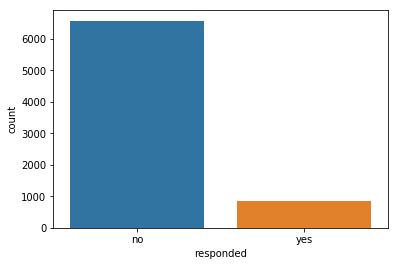

In [13]:
sns.countplot(data['responded'])

In [14]:
#Outlier analysis
#

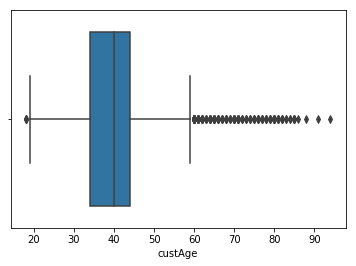

In [15]:
sns.boxplot(data.custAge)

In [16]:
#Count of outliers
data[data.custAge>60]['custAge'].count()
#data[data.custAge>60].shape[0]

141

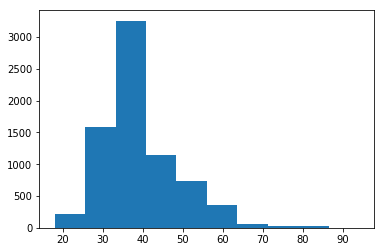

In [17]:
ax = plt.hist(data.custAge,bins=10)

In [18]:
#Bivariate Analysis

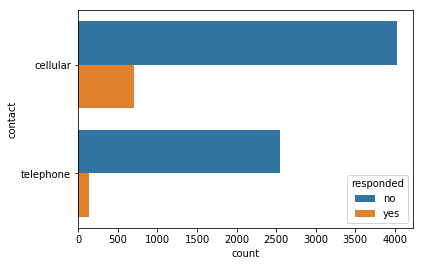

In [19]:
sns.countplot(y=data.contact,hue=data.responded)

In [20]:
data.contact.value_counts()

cellular     4731
telephone    2683
Name: contact, dtype: int64

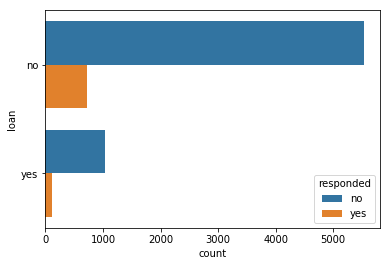

In [21]:
sns.countplot(y=data.loan,hue=data.responded)

In [22]:
# try other categoral columns wrt taregt

In [23]:
#Calculate the correlation for the numeric valriable

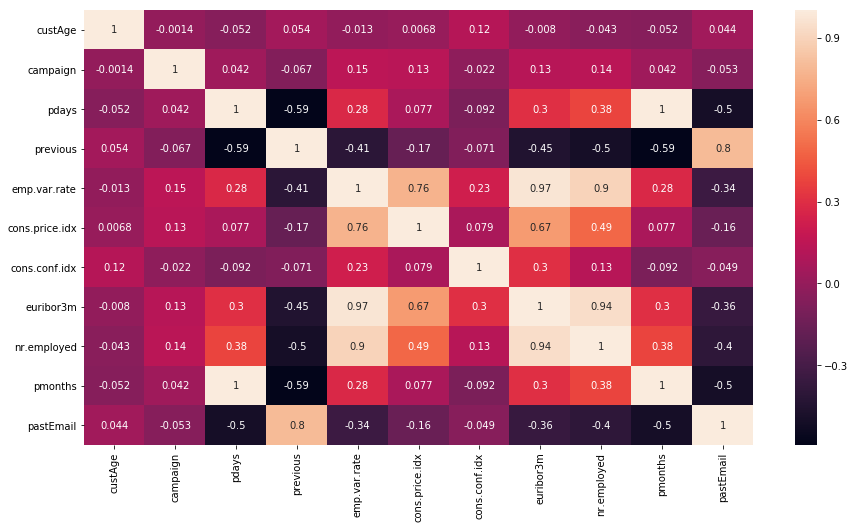

In [24]:
corr = data.corr()
plt.figure(figsize =(15,8))
ax = sns.heatmap(corr, annot=True)

In [25]:
# Encoding the Categoral variables

In [26]:
# Columns to perform Label Encoding
columns_to_le = ["profession","marital","schooling","contact","month","day_of_week","poutcome",
                "responded"]
#Label Encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in columns_to_le:
    data[col] = le.fit_transform(data[col])

In [27]:
data.head()

custAge  profession  marital  schooling default housing loan  contact  \
0  55.000000           0        2          6      no      no   no        0   
1  40.009804           1        1          6      no      no   no        0   
2  42.000000           9        1          3      no      no   no        1   
3  55.000000           4        0          6      no     yes  yes        0   
4  40.009804           0        0          6      no     yes   no        0   

   month  day_of_week  ...  previous  poutcome  emp.var.rate  cons.price.idx  \
0      7            1  ...         0         1          -0.1          93.200   
1      3            1  ...         0         1           1.4          93.918   
2      6            1  ...         0         1           1.1          93.994   
3      3            4  ...         0         1           1.4          93.918   
4      6            3  ...         1         0          -1.8          92.893   

   cons.conf.idx  euribor3m  nr.employed  pmonths  pastEmail  responded  
0          -42.0      4.191       5195.8    999.0          0          0  
1          -42.7      4.960       5228.1    999.0          0          0  
2          -36.4      4.857       5191.0    999.0          0          0  
3          -42.7      4.962       5228.1    999.0          0          0  
4          -46.2      1.291       5099.1    999.0          1          0  

[5 rows x 22 columns]

In [28]:
# !pip install category_encoders
#!pip install statsmodels==0.10.0rc2 --pre --user

In [29]:
columns_to_oe = ["default","housing","loan"]
#Label Encoding the categorical columns
from category_encoders import OneHotEncoder
oe = OneHotEncoder(cols = columns_to_oe)
data = oe.fit_transform(data)

In [30]:
data.shape

(7414, 25)

In [31]:
'''
# Columns to perform Label Encoding
columns_to_le = ["default","housing","loan"]
#Label Encoding the categorical columns
from sklearn.preprocessing import OneHotEncoder
oe = OneHotEncoder()
for col in columns_to_le:
    data1[col] = oe.fit_transform(data[col].reshape(-1,1))
'''

'\n# Columns to perform Label Encoding\ncolumns_to_le = ["default","housing","loan"]\n#Label Encoding the categorical columns\nfrom sklearn.preprocessing import OneHotEncoder\noe = OneHotEncoder()\nfor col in columns_to_le:\n    data1[col] = oe.fit_transform(data[col].reshape(-1,1))\n'

In [32]:
#Changing 999 values of pdays and pmonth to -1
data.loc[data.pdays==999,'pdays'] = -1
data.loc[data.pmonths==999,'pmonths'] = -1

In [33]:
#Splitting X and y
X= data.drop("responded",axis=1)
y = data["responded"]

In [34]:
#Save numerical columns in a list
cnames = ["custAge","campaign","pdays","previous","emp.var.rate","cons.price.idx",
         "cons.conf.idx","euribor3m","nr.employed","pmonths","pastEmail"]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for col in cnames:
    X[col] = sc.fit_transform(X[[col]])

In [35]:
X.shape

(7414, 24)

In [36]:
X.head()

custAge  profession  marital  schooling  default_1  default_2  \
0  1.629770e+00           0        2          6          1          0   
1  7.725190e-16           1        1          6          1          0   
2  2.163789e-01           9        1          3          1          0   
3  1.629770e+00           4        0          6          1          0   
4  7.725190e-16           0        0          6          1          0   

   housing_1  housing_2  loan_1  loan_2  ...     pdays  previous  poutcome  \
0          1          0       1       0  ... -0.178638 -0.356294         1   
1          1          0       1       0  ... -0.178638 -0.356294         1   
2          1          0       1       0  ... -0.178638 -0.356294         1   
3          0          1       0       1  ... -0.178638 -0.356294         1   
4          0          1       1       0  ... -0.178638  1.578915         0   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
0     -0.096978       -0.641025      -0.309429   0.348394     0.418252   
1      0.859475        0.600533      -0.459983   0.789146     0.860089   
2      0.668184        0.731952       0.895006   0.730111     0.352591   
3      0.859475        0.600533      -0.459983   0.790292     0.860089   
4     -1.180959       -1.171886      -1.212754  -1.313738    -0.904526   

    pmonths  pastEmail  
0 -0.201061  -0.286848  
1 -0.201061  -0.286848  
2 -0.201061  -0.286848  
3 -0.201061  -0.286848  
4 -0.201061   0.505806  

[5 rows x 24 columns]

In [37]:
#Splitting the Data into train test

In [38]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

# Fitting a logistic regression model

In [39]:
from sklearn.linear_model import LogisticRegression
lregr = LogisticRegression()
lregr.fit(X_train,y_train)

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
y_predict_logreg = lregr.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict_logreg)

0.9136884693189481

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dectree = DecisionTreeClassifier()
dectree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [44]:
y_predict_dtree = dectree.predict(X_test)

In [45]:
accuracy_score(y_test,y_predict_dtree)

0.8361429534726905

In [48]:
from sklearn.ensemble import RandomForestClassifier
cls = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
cls.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [49]:
y_pred = cls.predict(X_test)

In [52]:
accuracy_score(y_test,y_pred)

90.49224544841537

In [53]:
## ROC Curve

In [54]:
probs = cls.predict_proba(X_test)

In [57]:
from sklearn import metrics
prob_positive = probs[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test,prob_positive)
roc_auc = metrics.auc(fpr,tpr)
print(roc_auc)

0.7282088029537506


In [58]:
##K-fold
X = X.to_numpy()

In [67]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True)

# enumerate the splits and summarize the distributions
for train_ix, test_ix in kfold.split(X, y):
    # select rows
    train_X, test_X = X[train_ix], X[test_ix]
    train_y, test_y = y[train_ix], y[test_ix]
    
    # summarize train and test composition
    train_0, train_1 = len(train_y[train_y==0]), len(train_y[train_y==1])
    test_0, test_1 = len(test_y[test_y==0]), len(test_y[test_y==1])
    print('Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

Train: 0=5246, 1=685, Test: 0=1328, 1=155
Train: 0=5260, 1=671, Test: 0=1314, 1=169
Train: 0=5271, 1=660, Test: 0=1303, 1=180
Train: 0=5245, 1=686, Test: 0=1329, 1=154
Train: 0=5274, 1=658, Test: 0=1300, 1=182


K fold validation will not distibute minority and majority class samples in a appropriate ratio.
For imbalanced class problem, we need to divide the samples of minority and majority classes into appropriate ratio in the train set and test set

In [71]:
from sklearn.model_selection import StratifiedKFold

strata_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

scores=[]

# enumerate the splits and summarize the distributions
for train_ix, test_ix in strata_kfold.split(X, y):
    # select rows
    train_X, test_X = X[train_ix], X[test_ix]
    train_y, test_y = y[train_ix], y[test_ix]
    # summarize train and test composition
    train_0, train_1 = len(train_y[train_y==0]), len(train_y[train_y==1])
    test_0, test_1 = len(test_y[test_y==0]), len(test_y[test_y==1])
    print('Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))
    model = cls.fit(train_X, train_y)
    predictions=cls.predict(test_X)
    scores.append(model.score(test_X,test_y))

Train: 0=5259, 1=672, Test: 0=1315, 1=168
Train: 0=5259, 1=672, Test: 0=1315, 1=168
Train: 0=5259, 1=672, Test: 0=1315, 1=168
Train: 0=5259, 1=672, Test: 0=1315, 1=168
Train: 0=5260, 1=672, Test: 0=1314, 1=168


In [72]:
print('Scores from each prediction:', scores)
print('\nAverage k-fold score:', np.mean(scores))   

Scores from each prediction: [0.9008766014834795, 0.894807821982468, 0.8894133513149022, 0.8860418071476737, 0.8927125506072875]

Average k-fold score: 0.8927704265071622
